In the first notebook [notebook_01_webscraping_Evanescence_Within_Temptation.ipynb](http://localhost:8888/notebooks/Project_Evanescence_Within_Temptation/notebook_01_webscraping_Evanescence_Within_Temptation.ipynb) of this project we used web scrapping to obtain lyrics of `Evanescence` and `Within Temptation`. After that we used Spotify API to retrieve more details about both bands including information about them, their albums, and details about their lyrics including not only metadata (e.g. track_popularity, album_name ) but also audio features (e.g. valence, energy, tempo, liveness) [notebook_02_retrieve_Spotify_data-Evanescence_Within_Temptation.ipynb](http://localhost:8888/notebooks/Project_Evanescence_Within_Temptation/notebook_02_retrieve_Spotify_data-Evanescence_Within_Temptation.ipynb).

Now is time to use the data retrieved and try to explore and visualize as much as we can. Our goal is not only explore text data, but also visualize numeric and categorical features. 

In what concerns NLP (Natural Language Processing) I want to do some things:

1. Text analysis: Analyze both bands and compare them through their lyrics using some metrics and word clouds.
2. Sentiment analysis: Explore the sentiment, polarity, and subjectivity of the lyrics provided by [TextBlob](https://textblob.readthedocs.io/en/dev/index.html) to compare both bands through visualization.
3. I'll try also to connect metadata of tracks with the sentiment provided by lyrics to draw conclusions.
4. Analyse some of the audio features, in special the ones that have been pointed as mood features, i.e., valence and energy, and see if there is a relation between them and the sentiment of lyrics of a track.

Let’s get started!

# Loading all data

## Lyrics

In [22]:
import pandas as pd

In [2]:
df_lyrics_evanescence = pd.read_csv("./data/lyrics_evanescence_2020-02-16.csv")
df_lyrics_evanescence.sort_values(by='song_title').head(20)

,song_title,lyrics
3,4th of july,Shower in the dark day. Clean sparks driving d...
69,all that im living for,All that I'm living for. All that I'm dying fo...
50,angel of mine,You are everything I need to see. Smile and su...
41,anything for you,I'd give anything to give me to you. Can you f...
61,anywhere,"Dear my love, haven't you wanted to be with me..."
39,away from me,I hold my breath. as this life starts to take ...
78,before the dawn,Meet me after dark again. and I'll hold you. I...
59,bleed,How can I pretend that I don't see. What you h...
67,breathe no more,I've been looking in the mirror for so long.. ...
6,bring me to life,how can you see into my eyes. like open doors....


In [3]:
df_lyrics_within_temptation = pd.read_csv("./data/lyrics_within_temptation_2020-02-16.csv")
df_lyrics_within_temptation.sort_values(by='song_title').head(15)

,song_title,lyrics
17,a dangerous mind,Cause something is not right. I follow the sig...
64,a demons fate,"Ooh, ooh, ooh, ooh, ooh. Ooh, ooh, ooh, ooh, o..."
21,all i need,I'm dying to catch my breath. Oh why don't I e...
60,angels,Sparkling angel I believed. You were my saviou...
40,another day,I know you are going away. I take my love into...
51,aquarius,I hear your whispers. Break the silence and it...
29,bittersweet,If I tell you. Will you listen?. Will you stay...
67,blue eyes,Blue eyes wide to the world. Full of dreams an...
56,caged,These are the darkest clouds. They have surrou...
31,candles,Take away. These hands of darkness. Reaching f...


## Spotify's data

From all the data retrieved I'll concentrate on the track's information csv. I'll be using the one we saved in .csv that should have eliminated at least some duplicates from tracks.

In [4]:
df_tracks_evanescence = pd.read_csv("./data/info_tracks_evanescence_without_duplicates_2020-02-16.csv")
df_tracks_evanescence.sort_values(by='track_name').head(10)

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
51,Evanescence (Deluxe Version),2011-01-01,2011,3UkDyGtriDY7NzOJbF0rIH,a new way to bleed,226400,44,NaN,0.378,0.895,1,-4.347,1,0.0531,0.00005,0.025200,0.1500,0.2580,155.946
37,The Open Door,2006-01-01,2006,4iDQezFTnOwgnrPYiqQ6TP,all that i am living for,228706,48,NaN,0.514,0.809,3,-4.396,0,0.0617,0.01210,0.000000,0.0763,0.3850,136.881
58,Lost Whispers,2016-01-01,2016,2lH8hMXxuIcjpbIok9KbUj,breathe no more b side version,228809,49,NaN,0.620,0.186,11,-8.527,0,0.0284,0.97100,0.000001,0.1170,0.2190,96.992
19,Anywhere But Home (Live),2004-01-01,2004,2zn4moJkEmIVfV83iye9t5,"breathe no more live from le zénith,france/2004",213853,33,NaN,0.562,0.431,11,-10.670,0,0.0307,0.32300,0.018500,0.9550,0.1670,108.012
1,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,0.331,0.943,4,-3.188,0,0.0698,0.00721,0.000002,0.2420,0.2960,94.612
73,Synthesis Live,2018-12-14,2018,1rvxZ0qg96Nkr3PLhHTbCA,bring me to life live,264026,29,https://p.scdn.co/mp3-preview/87cbd661e1853b8f...,0.149,0.813,4,-5.260,0,0.0560,0.34600,0.000021,0.9140,0.2420,90.642
21,Anywhere But Home (Live),2004-01-01,2004,1AjCrY9w0edn2jAGEAkzJ7,"bring me to life live from le zénith,france/...",283760,40,NaN,0.341,0.825,4,-7.220,0,0.0622,0.02210,0.030600,0.5220,0.0398,94.992
64,Synthesis,2017-11-08,2017,4vHFFk4Vm9NWhGq2FAsTlj,bring me to life synthesis,257320,6,NaN,0.362,0.785,4,-3.876,0,0.0567,0.61000,0.000001,0.0722,0.1600,90.904
27,The Open Door,2006-01-01,2006,663Karu2rvKLdnY0eo1n3M,call me when you're sober,214706,64,NaN,0.450,0.883,7,-4.094,1,0.0524,0.00193,0.000000,0.2930,0.3280,93.410
30,The Open Door,2006-01-01,2006,6Sh05fnlrLbMfSuI8Qur6a,cloud nine,262173,44,NaN,0.125,0.893,3,-4.217,0,0.2100,0.04320,0.000085,0.1510,0.1900,194.550


In [5]:
df_tracks_within_temptation = pd.read_csv("./data/info_tracks_within_temptation_without_duplicates_2020-02-16.csv")
df_tracks_within_temptation.sort_values(by='track_name').head(10)

,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
32,The Silent Force,2004-11-15,2004,6D5ih8y9mKmCSkuZO2Up2Q,a dangerous mind,256533,34,https://p.scdn.co/mp3-preview/c2c47b037fe1394c...,0.365,0.894,6,-5.491,0,0.0727,0.071100,0.000378,0.1350,0.476,180.200
75,The Unforgiving,2011-03-25,2011,6ivwIJGFnzTRPG2dHvKA07,a demon's fate,329537,40,https://p.scdn.co/mp3-preview/cd99a3cda30d3714...,0.460,0.912,5,-3.444,0,0.0596,0.000579,0.000217,0.1040,0.311,134.074
42,The Heart Of Everything,2007-11-09,2007,0lW4J9tzxpODQ8IExSumDW,all i need,290946,24,https://p.scdn.co/mp3-preview/15ddd25586b4f62e...,0.233,0.730,10,-4.855,1,0.0449,0.201000,0.000004,0.1300,0.123,152.972
55,An Acoustic Night At The Theatre,2009-11-02,2009,1tbSP6d2KwBB2DZUJLalRZ,all i need live,320946,21,https://p.scdn.co/mp3-preview/eae98f3734badfd0...,0.368,0.674,7,-5.859,0,0.0328,0.424000,0.000000,0.9510,0.124,149.204
91,Hydra (Special Edition),2014-02-04,2014,6MubsJeQrVa0k7lJSxcdaM,and we run,230067,7,https://p.scdn.co/mp3-preview/af524142f40dcacf...,0.544,0.837,6,-4.618,0,0.0465,0.059600,0.000000,0.0698,0.159,128.980
99,Hydra (Special Edition),2014-02-04,2014,13cZ2hORsadxvc2KLUBZoA,and we run evolution track,341497,5,https://p.scdn.co/mp3-preview/fc476336bac928d0...,0.578,0.723,6,-7.949,0,0.0507,0.136000,0.000002,0.1960,0.165,129.054
131,Let Us Burn - Elements & Hydra Live In Concert,2014-11-12,2014,301osYEEEVs4EQNXZXStCi,and we run live 2014,236746,0,https://p.scdn.co/mp3-preview/3789af5d464b633f...,0.510,0.865,9,-4.793,1,0.0431,0.190000,0.000031,0.6790,0.451,129.013
27,The Silent Force,2004-11-15,2004,3TEwbiC0GhIRStn3Eabtu7,angels,240440,55,https://p.scdn.co/mp3-preview/1dbf69a32db3b4d2...,0.341,0.867,7,-4.727,0,0.0492,0.293000,0.000000,0.2570,0.200,182.023
114,Let Us Burn - Elements & Hydra Live In Concert,2014-11-12,2014,6oQdvGElasxvHYutiewDSc,angels live 2012,252226,0,https://p.scdn.co/mp3-preview/9f9cc354c35bf303...,0.438,0.852,7,-5.567,0,0.0387,0.147000,0.000000,0.9760,0.246,91.061
105,Enter + The Dance,2014-10-11,2014,4nroowkyOM1HB9BOwUVV3M,another day,348453,16,https://p.scdn.co/mp3-preview/f76426030a7cfb44...,0.150,0.637,10,-6.177,1,0.0344,0.000843,0.003020,0.3570,0.174,150.038


One thing it can be noticed is that the song's titles of lyrics data have no " ' ", while the tracks's names from Spotify have. E.g.: song_title: call me when youre sober x track_name: call me when you're sober.

So I'll remove " ' " from all track_name.

In [6]:
df_tracks_evanescence["track_name"] = df_tracks_evanescence["track_name"].apply(lambda x: x.replace("'",""))
df_tracks_within_temptation["track_name"]=df_tracks_within_temptation["track_name"].apply(lambda x: x.replace("'",""))

# Try to merge lyrics data with Spotify's data

In [7]:
df_evanescence_merged = df_lyrics_evanescence.merge(df_tracks_evanescence, left_on='song_title', right_on='track_name')

In [8]:
df_evanescence_merged

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,lost in paradise,"I’ve been believing in something so distant, a...",Evanescence,2011-01-01,2011,7c8unZeNL9gI6Go9DgGYpb,lost in paradise,282293,46,NaN,...,0.571,8,-4.983,1,0.0376,0.053200,0.000004,0.0730,0.1040,113.059
1,going under,now I will tell you what I've done for you. 50...,Fallen,2003-01-01,2003,3UygY7qW2cvG9Llkay6i1i,going under,214946,68,NaN,...,0.858,11,-4.885,0,0.0545,0.008150,0.000021,0.2290,0.4640,175.077
2,lose control,You don't remember my name. I don't really car...,The Open Door,2006-01-01,2006,3DxKCst1JPt8qw7soauFXc,lose control,290000,43,NaN,...,0.726,8,-6.547,0,0.0608,0.096600,0.013400,0.1020,0.1610,90.126
3,bring me to life,how can you see into my eyes. like open doors....,Fallen,2003-01-01,2003,0COqiPhxzoWICwFCS4eZcp,bring me to life,235893,77,NaN,...,0.943,4,-3.188,0,0.0698,0.007210,0.000002,0.2420,0.2960,94.612
4,cloud nine,"If you want to live, let live.. If you want to...",The Open Door,2006-01-01,2006,6Sh05fnlrLbMfSuI8Qur6a,cloud nine,262173,44,NaN,...,0.893,3,-4.217,0,0.2100,0.043200,0.000085,0.1510,0.1900,194.550
5,lacrymosa,Out on your own. Cold and alone again. Can thi...,The Open Door,2006-01-01,2006,1M8YN6ekSgCnjc5UckHYpq,lacrymosa,217466,45,NaN,...,0.775,4,-5.350,0,0.0727,0.008010,0.000053,0.1040,0.1940,136.973
6,call me when youre sober,Don't cry to me. If you loved me. You would be...,The Open Door,2006-01-01,2006,663Karu2rvKLdnY0eo1n3M,call me when youre sober,214706,64,NaN,...,0.883,7,-4.094,1,0.0524,0.001930,0.000000,0.2930,0.3280,93.410
7,sweet sacrifice,"It's true, we're all a little insane. But it's...",The Open Door,2006-01-01,2006,7hlXiMxN81uctLsvbtHZ8x,sweet sacrifice,185533,53,NaN,...,0.870,2,-4.947,1,0.0903,0.006790,0.000003,0.3120,0.3360,97.013
8,imperfection,The more you try to fight it. The more you try...,Synthesis,2017-11-08,2017,4jdfxZWpcsTIAYs37OcY1y,imperfection,262893,10,NaN,...,0.832,5,-3.593,0,0.0615,0.204000,0.000044,0.1080,0.3390,83.040
9,farther away,"I took their smiles and I made them mine.. I,I...",Lost Whispers,2016-01-01,2016,63Yk0ZcjJSv37O8Vy7PFZi,farther away,239037,46,NaN,...,0.868,9,-3.834,1,0.0440,0.000285,0.155000,0.1850,0.3250,170.093


In [9]:
df_evanescence_merged.shape[0]/df_lyrics_evanescence.shape[0]

0.47674418604651164

We succeeded in having all information (lyrics, metadatad, and audio features) for 41 songs by simply merging our dataframes. This means that 47.7% of the `Evanescence's songs` for which we retrieved lyrics are represented with additional information.

In [10]:
df_within_temptation_merged = df_lyrics_within_temptation.merge(df_tracks_within_temptation, left_on='song_title', right_on='track_name')
df_within_temptation_merged

,song_title,lyrics,album_name,album_release_date,album_release_year,track_id,track_name,track_duration,track_popularity,track_preview,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,lost,My hope is on fire. My dreams are for sale. I ...,The Unforgiving,2011-03-25,2011,0v2Ad5NPKP8LKv48m0pVHx,lost,313469,38,https://p.scdn.co/mp3-preview/73c8077260af8b7b...,...,0.727,1,-3.751,1,0.0369,0.026000,0.000001,0.1200,0.1220,93.493
1,the swan song,"Winter has come for me, can't carry on. The ch...",The Silent Force,2004-11-15,2004,0hShpzIaJdb5nd1nNnBKmQ,the swan song,237573,34,https://p.scdn.co/mp3-preview/f7a7c64a916cf764...,...,0.533,8,-6.654,0,0.0288,0.417000,0.000012,0.0983,0.2820,79.958
2,in perfect harmony,At the end of a closing day. A little child wa...,Mother Earth,2000-12-24,2000,2Y7cKGD4mm9gXXHvUDIxvl,in perfect harmony,419453,23,https://p.scdn.co/mp3-preview/3aba1baa7c7af95e...,...,0.353,2,-10.836,1,0.0331,0.907000,0.001570,0.2050,0.1120,113.877
3,see who i am,"Is it true what they say,. are we too blind to...",The Silent Force,2004-11-15,2004,0CwkOVolvoJhO9Q2OH7zJf,see who i am,291533,43,https://p.scdn.co/mp3-preview/8b52de665a7413e1...,...,0.921,11,-4.250,0,0.0727,0.104000,0.000000,0.2500,0.2720,187.361
4,forsaken,Now the day has come. We are forsaken this tim...,The Silent Force,2004-11-15,2004,1O69rWQLUiNrhIRdeiLa6S,forsaken,293493,41,https://p.scdn.co/mp3-preview/f18f45599e52849c...,...,0.922,9,-4.555,0,0.0665,0.008520,0.000120,0.1020,0.2350,98.961
5,the howling,"We've been seeing what you want,. You've got u...",The Heart Of Everything,2007-11-09,2007,19BMw9z6SBfVQJyfCnAFyo,the howling,333866,27,https://p.scdn.co/mp3-preview/5a1858b2ce45e2a4...,...,0.953,6,-4.171,0,0.0681,0.011500,0.008370,0.1050,0.2790,93.008
6,what have you done,What have you done now. I know I'd better stop...,The Heart Of Everything,2007-11-09,2007,209U1Dxfp3k9FSYQ9oMUwk,what have you done,313333,30,https://p.scdn.co/mp3-preview/2b800076c0b572cd...,...,0.932,6,-3.813,0,0.1870,0.003580,0.000138,0.0982,0.1230,113.333
7,where is the edge,In the shadows it awakes the desire. But you k...,The Unforgiving,2011-03-25,2011,3MGoTdExMjBuJzaaFv8HbY,where is the edge,239253,35,https://p.scdn.co/mp3-preview/6fee29acaa320b87...,...,0.895,8,-3.924,0,0.0440,0.002550,0.000001,0.0906,0.2920,154.030
8,forgiven,Love you so it hurts my soul. Can you forgive ...,The Heart Of Everything,2007-11-09,2007,3diWdX9Upe8r0EPjoKBLmx,forgiven,292066,24,https://p.scdn.co/mp3-preview/7a2686a9a5e1999f...,...,0.342,7,-8.933,0,0.0298,0.932000,0.000816,0.1350,0.1720,99.888
9,never ending story,Armies have conquered. And fallen in the end. ...,Mother Earth,2000-12-24,2000,5STGuT6TzYESk0uuz9CHZj,never ending story,244453,23,https://p.scdn.co/mp3-preview/8caa2ea438613597...,...,0.322,2,-11.425,0,0.0301,0.435000,0.000427,0.1410,0.1350,137.083


In [11]:
df_within_temptation_merged.shape[0]/df_lyrics_within_temptation.shape[0]

0.7162162162162162

In the case of `Within Temptation`, we got complete information about 71.6% of the songs for which we have lyrics.

# Analysing lyrics

To start I'll build some Wordclouds and analyse some metrics solely based on lyrics since when merging the data not all lyrics were included.

Further investigation probably would increase the lyrics included, but for now we will keep like this.

In this part I will perform the following steps:

1. Clean `lyrics` and save the result in a new column `lyrics_clean`.
2. Apply [TextBlob](https://textblob.readthedocs.io/en/dev/index.html) and create columns with the sentiment property information (`polarity` and `subjectivity`). The polarity score is a float within the range [-1.0, 1.0] where -1.0 is very positive, 0 is neutral, and 1 is very positive. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
3. Use polarity to define a lyric as positive or negative. This information will be in a binary column `is_positive` where `1` indicates a positive lyric and `0` a negative one.
4. Create feature `lyrics_len` with the lenght of the lyric.
5. Create feature `num_words` with lyric's number of words.
6. Create feature `lexicalrichness` 
6. Build word clouds
7. Build some graphs.


## Some cleaning

There are some nice word clouds in R that I wanted to include in this project and in fact I have already something which is included in [GitHub](https://github.com/dpbac/evanescence_and_within_temptation_in_R).

For the R project my intention was to use the original lyrics csv that we have just loaded. However, when developing the R word cloud part some strange characters showed up and although I've tried some R option to try to clean there was no effect. So, I came back to Python and I decided to apply the following line of code:

        unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

found at https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py which just fine worked fine.

The following function includes some basic cleaning. If you need more cleaning the code presented at https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py can be very useful. 

In [12]:
import re
import unicodedata
from nltk.corpus import stopwords
import nltk

def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])


def clean_text(text):
    
    cleaned_text = text.apply(lambda x: removebrackets(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_accented_chars(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_special_chars(x))
    # lowercase
    cleaned_text = cleaned_text.apply(lambda x: x.lower())
    cleaned_text = cleaned_text.apply(lambda x: remove_stopwords(x))
    return cleaned_text

In [13]:
df_lyrics_evanescence['lyrics_clean'] = clean_text(df_lyrics_evanescence['lyrics'])

df_lyrics_evanescence

,song_title,lyrics,lyrics_clean
0,zero,"My reflection, dirty mirror. There's no connec...",reflection dirty mirror theres connection im l...
1,forgive me,Can you forgive me again?. I don't know what I...,forgive dont know said didnt mean hurt heard w...
2,lost in paradise,"I’ve been believing in something so distant, a...",ive believing something distant human ive deny...
3,4th of july,Shower in the dark day. Clean sparks driving d...,shower dark day clean sparks driving cool wate...
4,going under,now I will tell you what I've done for you. 50...,tell ive done 50 thousand tears ive cried scre...
...,...,...,...
81,i believe in you,You don't remember me. But I remember you. I l...,dont remember remember lie awake try hard thin...
82,wake me up inside bring me to life,How can you see into my eyes. Like open doors....,see eyes like open doors leading core ive come...
83,swimming home,Way down. I've been way down. Underneath this ...,way ive way underneath skin waiting hear name ...
84,haunted,long lost words whisper slowly to me. still ca...,long lost words whisper slowly still cant find...


In [14]:
df_lyrics_within_temptation['lyrics_clean'] = clean_text(df_lyrics_within_temptation['lyrics'])

df_lyrics_within_temptation

,song_title,lyrics,lyrics_clean
0,lost,My hope is on fire. My dreams are for sale. I ...,hope fire dreams sale dance wire dont want fai...
1,the swan song,"Winter has come for me, can't carry on. The ch...",winter come cant carry chains life strong soon...
2,in perfect harmony,At the end of a closing day. A little child wa...,end closing day little child born raised deep ...
3,overcome,Where are the heroes. I my time of need. Is my...,heroes time need crying abandoned gone oh tend...
4,sinead,I've gotta try. It's not over yet. No signals ...,ive got ta try yet signals love left heart ble...
...,...,...,...
69,dark wings,Why was I one of the chosen ones?. Until the f...,one chosen ones fight could see magic strength...
70,fire and ice,Every word you're saying is a lie. Run away my...,every word youre saying lie run away dear ever...
71,grace,Cold are the bones of thy soldiers. Longing fo...,cold bones thy soldiers longing home little pa...
72,utopia feat chris jones,The burning desire. To live and roam free. It ...,burning desire live roam free shines dark grow...


## Adding sentiment measures

In [15]:
from textblob import TextBlob

def calculate_sentiment(text):
    
    sent = TextBlob(text).sentiment
    polarity = round(sent[0],3)
    subjectivity = round(sent[1],3)
    
    return (polarity, subjectivity)
    

In [16]:
# Adding polarity and subjectivity of lyrics
df_lyrics_evanescence['polarity'] = df_lyrics_evanescence['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[0])
df_lyrics_evanescence['subjectivity'] = df_lyrics_evanescence['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[1])

# Adding column that indicates if a lyric has a positive (1) or negative (0) sentiment based on polarity
df_lyrics_evanescence['is_positive'] = df_lyrics_evanescence['polarity'].apply(lambda x: 1 if x > 0 else 0)

In [17]:
# Adding polarity and subjectivity of lyrics
df_lyrics_within_temptation['polarity'] = df_lyrics_within_temptation['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[0])
df_lyrics_within_temptation['subjectivity'] = df_lyrics_within_temptation['lyrics_clean'].apply(lambda x: calculate_sentiment(x)[1])

# Adding column that indicates if a lyric has a positive (1) or negative (0) sentiment based on polarity
df_lyrics_within_temptation['is_positive'] = df_lyrics_within_temptation['polarity'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
df_lyrics_evanescence.head()

,song_title,lyrics,lyrics_clean,polarity,subjectivity,is_positive
0,zero,"My reflection, dirty mirror. There's no connec...",reflection dirty mirror theres connection im l...,0.125,0.444,1
1,forgive me,Can you forgive me again?. I don't know what I...,forgive dont know said didnt mean hurt heard w...,-0.028,0.680,0
2,lost in paradise,"I’ve been believing in something so distant, a...",ive believing something distant human ive deny...,-0.279,0.375,0
3,4th of july,Shower in the dark day. Clean sparks driving d...,shower dark day clean sparks driving cool wate...,0.131,0.514,1
4,going under,now I will tell you what I've done for you. 50...,tell ive done 50 thousand tears ive cried scre...,-0.200,0.586,0


In [19]:
df_lyrics_within_temptation.head()

,song_title,lyrics,lyrics_clean,polarity,subjectivity,is_positive
0,lost,My hope is on fire. My dreams are for sale. I ...,hope fire dreams sale dance wire dont want fai...,0.015,0.454,1
1,the swan song,"Winter has come for me, can't carry on. The ch...",winter come cant carry chains life strong soon...,0.303,0.713,1
2,in perfect harmony,At the end of a closing day. A little child wa...,end closing day little child born raised deep ...,0.461,0.570,1
3,overcome,Where are the heroes. I my time of need. Is my...,heroes time need crying abandoned gone oh tend...,-0.091,0.645,0
4,sinead,I've gotta try. It's not over yet. No signals ...,ive got ta try yet signals love left heart ble...,0.150,0.508,1


## Lyrics lenght and word counts

In [20]:
df_lyrics_evanescence['lyric_len'] = df_lyrics_evanescence['lyrics_clean'].astype(str).apply(len)
df_lyrics_evanescence['word_count'] = df_lyrics_evanescence['lyrics_clean'].apply(lambda x: len(str(x).split()))

df_lyrics_within_temptation['lyric_len'] = df_lyrics_within_temptation['lyrics_clean'].astype(str).apply(len)
df_lyrics_within_temptation['word_count'] = df_lyrics_within_temptation['lyrics_clean'].apply(lambda x: len(str(x).split()))

# Word clouds


In [23]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

colormap matplotlib: https://matplotlib.org/examples/color/colormaps_reference.html

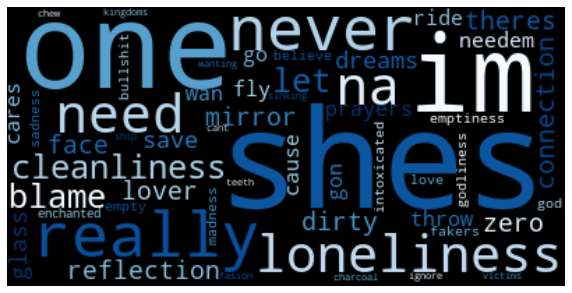

In [40]:
evanescence_word_cloud = WordCloud(max_words=200, background_color="black",stopwords=STOPWORDS, random_state=123, 
                                   colormap='Blues').generate(df_lyrics_evanescence.lyrics_clean[0])
plt.figure(figsize=(10, 10))
plt.imshow(evanescence_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

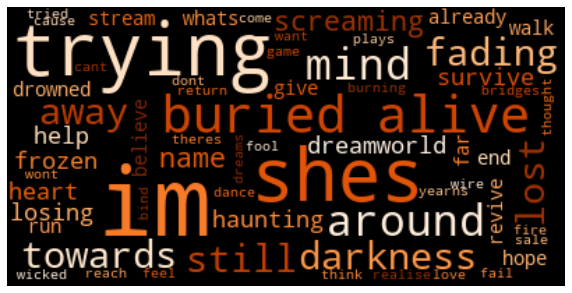

In [26]:
within_temptation_word_cloud = WordCloud(max_words=200, background_color="black",stopwords=STOPWORDS, random_state=123, 
                                   colormap='Oranges').generate(df_lyrics_within_temptation.lyrics_clean[0])
plt.figure(figsize=(10, 10))
plt.imshow(within_temptation_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



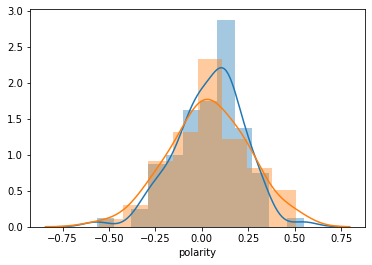

In [32]:
sns.distplot(df_lyrics_evanescence['polarity'])
sns.distplot(df_lyrics_within_temptation['polarity'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



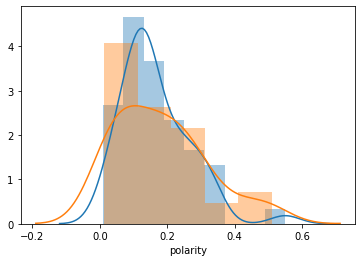

In [39]:
sns.distplot(df_lyrics_evanescence['polarity'][df_lyrics_evanescence['is_positive']==1])
sns.distplot(df_lyrics_within_temptation['polarity'][df_lyrics_within_temptation['is_positive']==1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



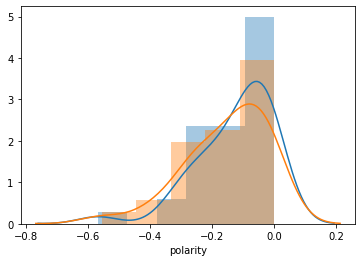

In [41]:
sns.distplot(df_lyrics_evanescence['polarity'][df_lyrics_evanescence['is_positive']==0])
sns.distplot(df_lyrics_within_temptation['polarity'][df_lyrics_within_temptation['is_positive']==0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



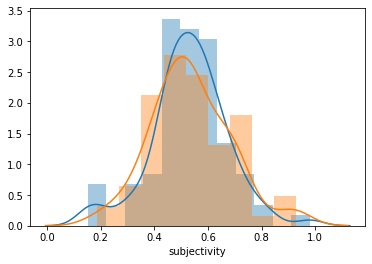

In [33]:
sns.distplot(df_lyrics_evanescence['subjectivity'])
sns.distplot(df_lyrics_within_temptation['subjectivity'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



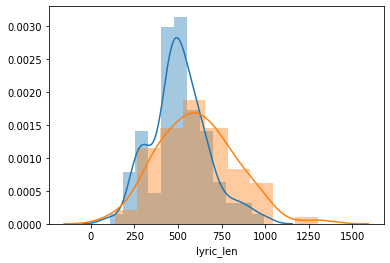

In [42]:
sns.distplot(df_lyrics_evanescence['lyric_len'])
sns.distplot(df_lyrics_within_temptation['lyric_len'])

In [ ]:
sns.distplot(df_lyrics_evanescence['subjectivity'])
sns.distplot(df_lyrics_within_temptation['subjectivity'])

In [47]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [48]:
df_lyrics_within_temptation['subjectivity'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

# Sentiment Analysis